Initial Data Preview:
      price    area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420.0         4          2        3      yes        no       no   
1  12250000  8960.0         4          4        4      yes        no       no   
2  12250000  9960.0         3          2        2      yes        no      yes   
3  12215000     NaN         4          2        2      yes        no      yes   
4  11410000     NaN         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Data After Dropping Missing Values:
       price    area  bedroo

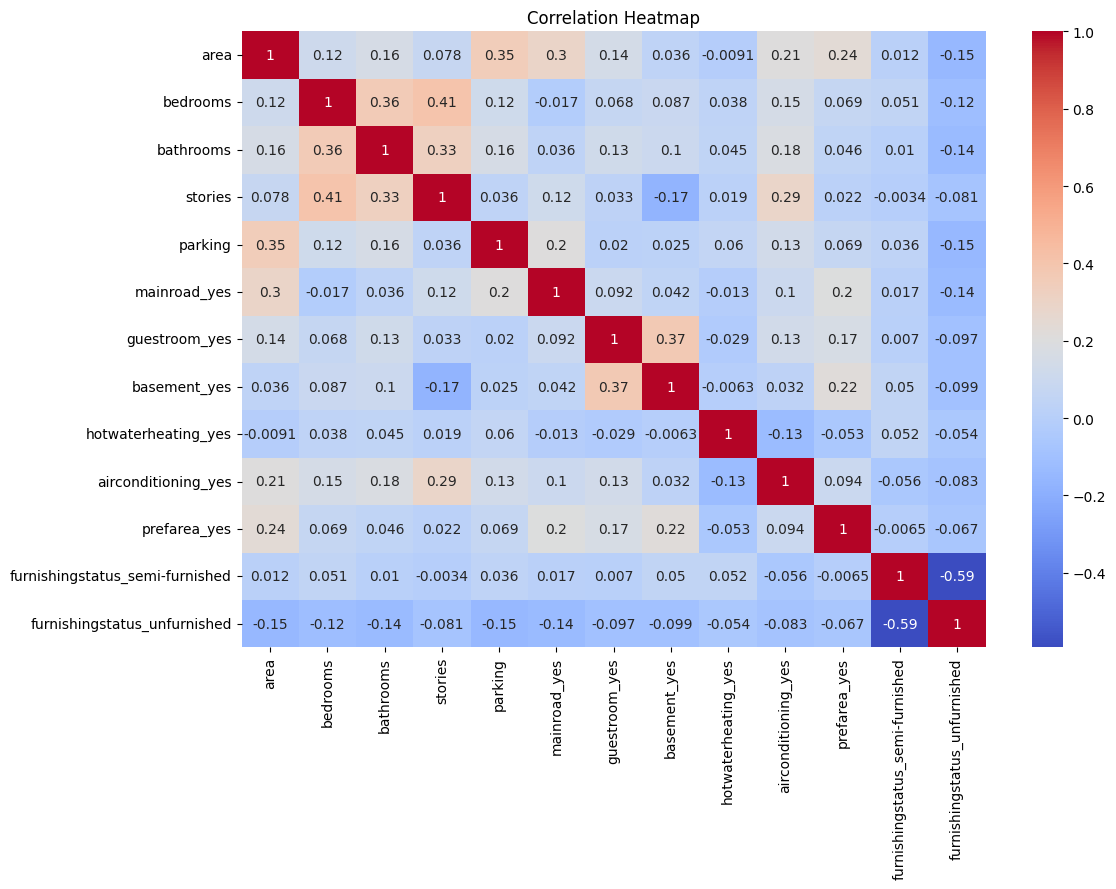


Processed Data Saved to 'Processed_Housing_Data.csv'.


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


dataset = pd.read_csv('Housing Price.csv')
print("Initial Data Preview:")
print(dataset.head())


dataset_cleaned = dataset.dropna()
print("\nData After Dropping Missing Values:")
print(dataset_cleaned.head())


categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating','airconditioning', 'prefarea', 'furnishingstatus']

print("\nCategorical Features to be Encoded:")
print(categorical_features)


dataset_encoded = pd.get_dummies(dataset_cleaned, columns=categorical_features, drop_first=True)
print("\nData After One-Hot Encoding Categorical Columns:")
print(dataset_encoded.head())


features = dataset_encoded.drop('price', axis=1)
target = dataset_encoded['price']


features_unique = features.drop_duplicates()
print("\nFeatures After Removing Duplicate Rows:")
print(features_unique.head())


target_aligned = target.loc[features_unique.index]


scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_unique)


features_scaled_df = pd.DataFrame(features_scaled, columns=features_unique.columns)
print("\nFeatures After Scaling:")
print(features_scaled_df.head())


correlation_matrix = features_scaled_df.corr()
print("\nCorrelation Matrix of Scaled Features:")
print(correlation_matrix)


correlation_threshold = 0.9


correlation_mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
highly_correlated = [column for column in correlation_matrix.columns if any(abs(correlation_matrix[column]) > correlation_threshold)]

print(f"\nFeatures to Drop Due to High Correlation (Above {correlation_threshold}):", highly_correlated)


features_final = features_scaled_df.drop(columns=highly_correlated)
print("\nFeatures After Removing Highly Correlated Variables:")
print(features_final.head())

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()


final_dataset = pd.concat([features_final, target_aligned.reset_index(drop=True)], axis=1)
final_dataset.to_csv('Processed_Housing_Data.csv', index=False)
print("\nProcessed Data Saved to 'Processed_Housing_Data.csv'.")
